In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import cm
from datetime import datetime
import seaborn as sns
from scipy.stats import boxcox
import re

In [2]:
# Creating dataframe
df = pd.read_csv('US_Accidents_Dec20_updated.csv')
df.head(3)

,ID,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Description,...,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
0,A-2716600,3,2016-02-08 00:37:08,2016-02-08 06:37:08,40.10891,-83.09286,40.11206,-83.03187,3.230,Between Sawmill Rd/Exit 20 and OH-315/Olentang...,...,False,False,False,False,False,False,Night,Night,Night,Night
1,A-2716601,2,2016-02-08 05:56:20,2016-02-08 11:56:20,39.86542,-84.06280,39.86501,-84.04873,0.747,At OH-4/OH-235/Exit 41 - Accident.,...,False,False,False,False,False,False,Night,Night,Night,Night
2,A-2716602,2,2016-02-08 06:15:39,2016-02-08 12:15:39,39.10266,-84.52468,39.10209,-84.52396,0.055,At I-71/US-50/Exit 1 - Accident.,...,False,False,False,False,False,False,Night,Night,Night,Day


# EDA

In [3]:
# Checking columns' names
df.columns

Index(['ID', 'Severity', 'Start_Time', 'End_Time', 'Start_Lat', 'Start_Lng',
       'End_Lat', 'End_Lng', 'Distance(mi)', 'Description', 'Number', 'Street',
       'Side', 'City', 'County', 'State', 'Zipcode', 'Country', 'Timezone',
       'Airport_Code', 'Weather_Timestamp', 'Temperature(F)', 'Wind_Chill(F)',
       'Humidity(%)', 'Pressure(in)', 'Visibility(mi)', 'Wind_Direction',
       'Wind_Speed(mph)', 'Precipitation(in)', 'Weather_Condition', 'Amenity',
       'Bump', 'Crossing', 'Give_Way', 'Junction', 'No_Exit', 'Railway',
       'Roundabout', 'Station', 'Stop', 'Traffic_Calming', 'Traffic_Signal',
       'Turning_Loop', 'Sunrise_Sunset', 'Civil_Twilight', 'Nautical_Twilight',
       'Astronomical_Twilight'],
      dtype='object')

In [4]:
# Shape of df, number of rows and columns
df.shape

(1516064, 47)

In [5]:
# Types of data
df.dtypes

ID                        object
Severity                   int64
Start_Time                object
End_Time                  object
Start_Lat                float64
Start_Lng                float64
End_Lat                  float64
End_Lng                  float64
Distance(mi)             float64
Description               object
Number                   float64
Street                    object
Side                      object
City                      object
County                    object
State                     object
Zipcode                   object
Country                   object
Timezone                  object
Airport_Code              object
Weather_Timestamp         object
Temperature(F)           float64
Wind_Chill(F)            float64
Humidity(%)              float64
Pressure(in)             float64
Visibility(mi)           float64
Wind_Direction            object
Wind_Speed(mph)          float64
Precipitation(in)        float64
Weather_Condition         object
Amenity   

In [6]:
# View summary statistics for columns with numeric data
df.describe()

,Severity,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Number,Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Speed(mph),Precipitation(in)
count,1.516064e+06,1.516064e+06,1.516064e+06,1.516064e+06,1.516064e+06,1.516064e+06,4.699690e+05,1.473031e+06,1.066748e+06,1.470555e+06,1.479790e+06,1.471853e+06,1.387202e+06,1.005515e+06
mean,2.238630e+00,3.690056e+01,-9.859919e+01,3.690061e+01,-9.859901e+01,5.872617e-01,8.907533e+03,5.958460e+01,5.510976e+01,6.465960e+01,2.955495e+01,9.131755e+00,7.630812e+00,8.477855e-03
std,6.081481e-01,5.165653e+00,1.849602e+01,5.165629e+00,1.849590e+01,1.632659e+00,2.242190e+04,1.827316e+01,2.112735e+01,2.325986e+01,1.016756e+00,2.889112e+00,5.637364e+00,1.293168e-01
min,1.000000e+00,2.457022e+01,-1.244976e+02,2.457011e+01,-1.244978e+02,0.000000e+00,0.000000e+00,-8.900000e+01,-8.900000e+01,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,2.000000e+00,3.385422e+01,-1.182076e+02,3.385420e+01,-1.182077e+02,0.000000e+00,1.212000e+03,4.700000e+01,4.080000e+01,4.800000e+01,2.944000e+01,1.000000e+01,4.600000e+00,0.000000e+00
50%,2.000000e+00,3.735113e+01,-9.438100e+01,3.735134e+01,-9.437987e+01,1.780000e-01,4.000000e+03,6.100000e+01,5.700000e+01,6.800000e+01,2.988000e+01,1.000000e+01,7.000000e+00,0.000000e+00
75%,2.000000e+00,4.072593e+01,-8.087469e+01,4.072593e+01,-8.087449e+01,5.940000e-01,1.010000e+04,7.300000e+01,7.100000e+01,8.400000e+01,3.004000e+01,1.000000e+01,1.040000e+01,0.000000e+00
max,4.000000e+00,4.900058e+01,-6.711317e+01,4.907500e+01,-6.710924e+01,1.551860e+02,9.999997e+06,1.706000e+02,1.130000e+02,1.000000e+02,5.804000e+01,1.400000e+02,9.840000e+02,2.400000e+01


In [7]:
# Checking sum of the missing values
df.isna().sum()

ID                             0
Severity                       0
Start_Time                     0
End_Time                       0
Start_Lat                      0
Start_Lng                      0
End_Lat                        0
End_Lng                        0
Distance(mi)                   0
Description                    0
Number                   1046095
Street                         0
Side                           0
City                          83
County                         0
State                          0
Zipcode                      935
Country                        0
Timezone                    2302
Airport_Code                4248
Weather_Timestamp          30264
Temperature(F)             43033
Wind_Chill(F)             449316
Humidity(%)                45509
Pressure(in)               36274
Visibility(mi)             44211
Wind_Direction             41858
Wind_Speed(mph)           128862
Precipitation(in)         510549
Weather_Condition          44007
Amenity   

In [8]:
# Unique cities
cities = df['City'].unique()
len(cities)

10658

In [9]:
# cities by the number of accidents
accidents_by_cities = df['City'].value_counts()
accidents_by_cities[:10]

Los Angeles    39984
Miami          36233
Charlotte      22203
Houston        20843
Dallas         19497
Sacramento     18431
Orlando        16169
Portland       14805
San Diego      14090
Minneapolis    12653
Name: City, dtype: int64

# Plots

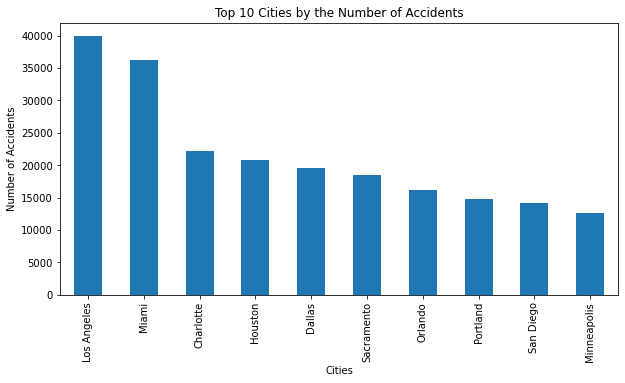

In [10]:
# Visualising top 10 cities by the number of accidents
fig, ax = plt.subplots(figsize=(10,5))
accidents_by_cities[:10].plot(kind='bar')
plt.xlabel('Cities')
plt.ylabel('Number of Accidents')
plt.title('Top 10 Cities by the Number of Accidents');

Text(0.5, 1.0, 'Accidents Count Distribution')

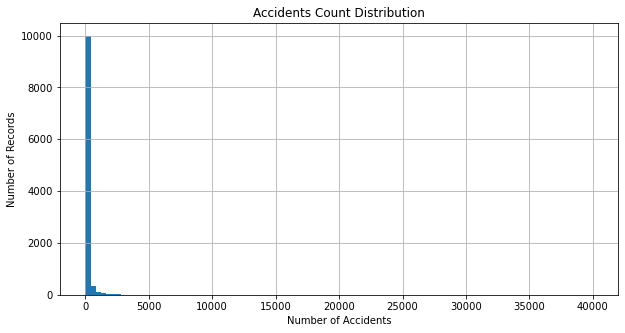

In [11]:
# Accidents count distribution 

fig, ax = plt.subplots(figsize=(10,5))
accidents_by_cities.hist(bins=100)
plt.xlabel("Number of Accidents")
plt.ylabel("Number of Records")
plt.title('Accidents Count Distribution')

# the majority of all the cities have less than 5000 accidents and the the most number of records is less than 2500

In [12]:
# Accidents number by severity level
accidents_severity = df.groupby('Severity').count()['ID']
accidents_severity

Severity
1      28178
2    1212382
3     161052
4     114452
Name: ID, dtype: int64

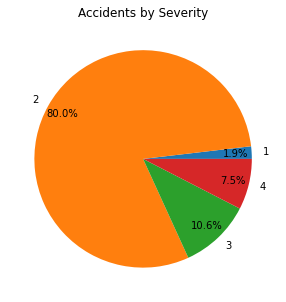

In [13]:
# Pie chart of accidents by severity
fig, ax = plt.subplots(figsize=(10,5))
labels = [1,2,3,4]
plt.pie(accidents_severity, labels=labels,
        autopct='%1.1f%%', pctdistance=0.85)
plt.title('Accidents by Severity')
plt.show()

In [14]:
# Converting Start Time and End Time from obj to datetime
df['Start_Time'] = pd.to_datetime(df['Start_Time'])
df['End_Time'] = pd.to_datetime(df['End_Time'])

# Checking
df['Start_Time'].dtypes

dtype('<M8[ns]')

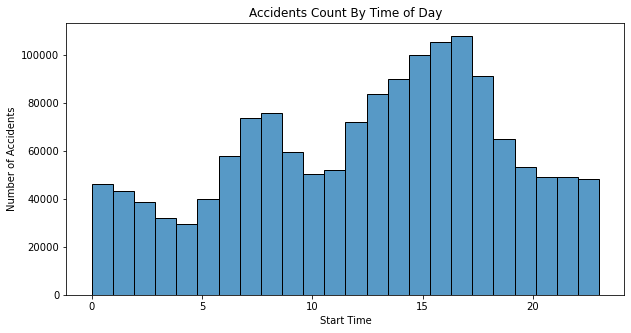

In [15]:
# Visualising accidents by the time of the day
fig, ax = plt.subplots(figsize=(10,5))
sns.histplot(df['Start_Time'].dt.hour, bins = 24)

plt.xlabel("Start Time")
plt.ylabel("Number of Accidents")
plt.title('Accidents Count By Time of Day')

plt.show()

# morning peak 8-9a.m. and afternoon peak 4-6p.m.

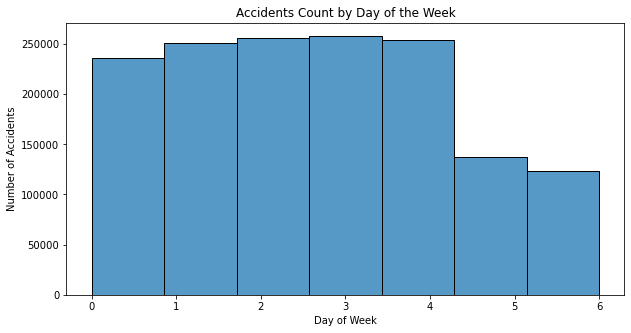

In [16]:
# Visualising accidents by day of the week 

fig, ax = plt.subplots(figsize=(10,5))
sns.histplot(df['Start_Time'].dt.dayofweek, bins = 7)

plt.xlabel("Day of Week")
plt.ylabel("Number of Accidents")
plt.title('Accidents Count by Day of the Week')

plt.show()

# most accidents happen Monday to Friday

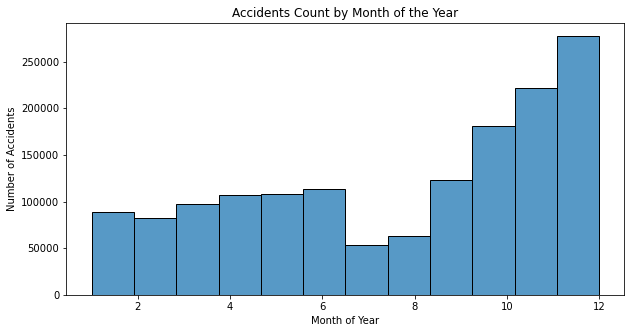

In [17]:
# Visualizing accidents by the month of the year

fig, ax = plt.subplots(figsize=(10,5))
sns.histplot(df['Start_Time'].dt.month, bins = 12)

plt.xlabel("Month of Year")
plt.ylabel("Number of Accidents")
plt.title('Accidents Count by Month of the Year')

plt.show()

# decreasing during summer and increasing by winter. The biggest number is during December probably because of Christmas

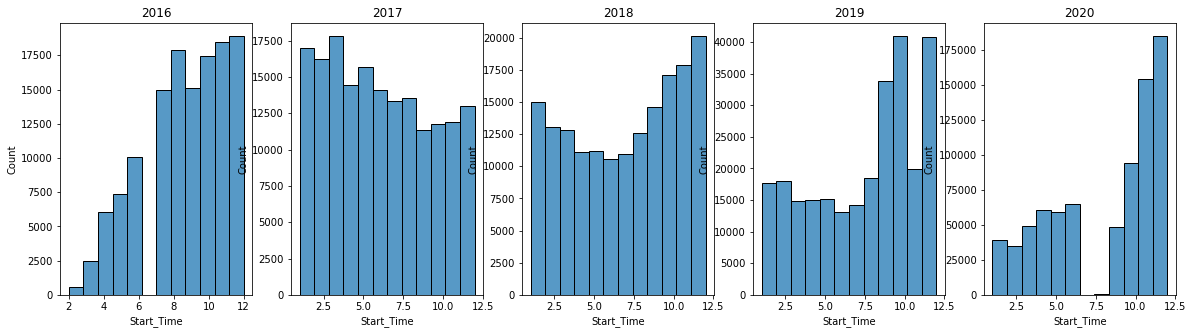

In [18]:
# Visualising years by month of the year

dt_2016 = df[df['Start_Time'].dt.year==2016]
dt_2017 = df[df['Start_Time'].dt.year==2017]
dt_2018 = df[df['Start_Time'].dt.year==2018]
dt_2019 = df[df['Start_Time'].dt.year==2019]
dt_2020 = df[df['Start_Time'].dt.year==2020]

fig, ax = plt.subplots(1,5,figsize=(20, 5))
sns.histplot(dt_2016['Start_Time'].dt.month, bins = 12, ax=ax[0])
sns.histplot(dt_2017['Start_Time'].dt.month, bins = 12, ax=ax[1])
sns.histplot(dt_2018['Start_Time'].dt.month, bins = 12, ax=ax[2])
sns.histplot(dt_2019['Start_Time'].dt.month, bins = 12, ax=ax[3])
sns.histplot(dt_2020['Start_Time'].dt.month, bins = 12, ax=ax[4])
ax[0].set_title("2016")
ax[1].set_title("2017")
ax[2].set_title("2018")
ax[3].set_title("2019")
ax[4].set_title("2020");

# some data is missing probably due imperfection of data sources. 
#in 2020 was it a lockdown or data gathering problem we can only guess.

In [19]:
# Accidents by the side of the road

side_of_road =  df.groupby(['Side']).count()['ID']
side_of_road

Side
L     221502
R    1294562
Name: ID, dtype: int64

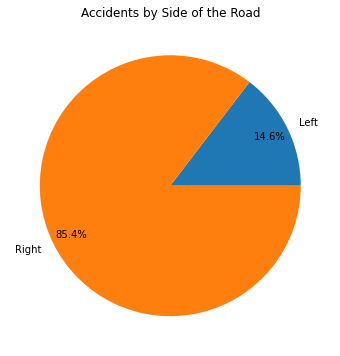

In [20]:
# Pie chart
fig, ax = plt.subplots(figsize=(8, 6))
labels = ['Left', 'Right']
plt.pie(side_of_road, labels=labels, autopct='%1.1f%%', pctdistance=0.85)
plt.title('Accidents by Side of the Road');

In [21]:
# Weather conditions of accidents

weather_conditions = df.groupby(['Weather_Condition']).count()['ID'].sort_values(ascending=False)
weather_conditions

Weather_Condition
Fair                         465252
Mostly Cloudy                193595
Clear                        180223
Cloudy                       161291
Partly Cloudy                133102
                              ...  
Sleet / Windy                     1
Light Fog                         1
Low Drifting Snow                 1
Freezing Rain / Windy             1
Sand / Dust Whirls Nearby         1
Name: ID, Length: 116, dtype: int64

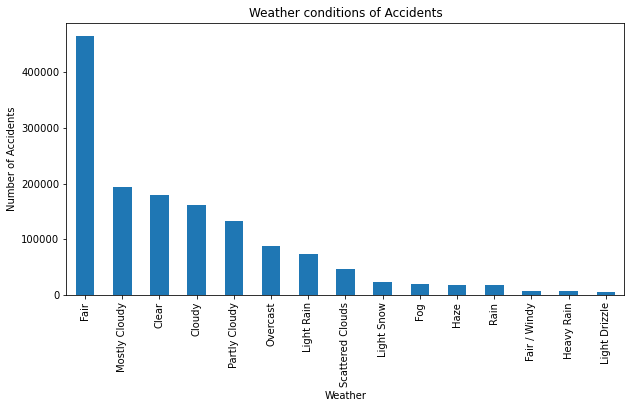

In [22]:
# Visualising weather conditions

fig, ax = plt.subplots(figsize=(10,5))
weather_conditions[:15].plot(kind='bar')
plt.title('Weather conditions of Accidents')
plt.ylabel('Number of Accidents')
plt.xlabel('Weather')
plt.show()

# most accidents happened during fair weather

# Data cleanup

#### As we plan to create a prediction model, columns that contain data related to accidents that already happened seem to have minimum value for us, therefore they can be dropped. Thats why we drop 'Distance(mi)', 'End_Time', 'End_Lat', 'End_Lng'. Also we drop 'ID' and 'Description' as they provide no useful information for future ML model.

In [23]:
df = df.drop(['ID', 'Description', 'Distance(mi)', 'End_Time', 'End_Lat', 'End_Lng'], axis=1)

In [24]:
# Checking categorial features

cat_names = ['Side', 'Country', 'Timezone', 'Amenity', 'Bump', 'Crossing', 
             'Give_Way', 'Junction', 'No_Exit', 'Railway', 'Roundabout', 'Station', 
             'Stop', 'Traffic_Calming', 'Traffic_Signal', 'Turning_Loop', 'Sunrise_Sunset', 
             'Civil_Twilight', 'Nautical_Twilight', 'Astronomical_Twilight']
print("Unique count of categorical features:")
for i in cat_names:
  print(i,df[i].nunique())

Unique count of categorical features:
Side 2
Country 1
Timezone 4
Amenity 2
Bump 2
Crossing 2
Give_Way 2
Junction 2
No_Exit 2
Railway 2
Roundabout 2
Station 2
Stop 2
Traffic_Calming 2
Traffic_Signal 2
Turning_Loop 1
Sunrise_Sunset 2
Civil_Twilight 2
Nautical_Twilight 2
Astronomical_Twilight 2


#### Dropping 'Country' and 'Turning_Loop' because they have only one category

In [25]:
df = df.drop(['Country','Turning_Loop'], axis=1)

####  'Wind_Direction' and 'Weather_Condition' features both have inconsistency, so we need to clean them

In [26]:
# Wind_Direction
df['Wind_Direction'].unique()

array(['SW', 'Calm', 'WSW', 'WNW', 'West', 'NNW', 'South', 'W', 'NW',
       'North', 'SSE', 'SSW', 'ESE', 'SE', nan, 'East', 'Variable', 'NNE',
       'NE', 'ENE', 'CALM', 'S', 'VAR', 'N', 'E'], dtype=object)

In [27]:
# Wind_Direction feature cleaning

df.loc[df['Wind_Direction']=='Calm','Wind_Direction'] = 'CALM'
df.loc[(df['Wind_Direction']=='West')|(df['Wind_Direction']=='WSW')|(df['Wind_Direction']=='WNW'),'Wind_Direction'] = 'W'
df.loc[(df['Wind_Direction']=='South')|(df['Wind_Direction']=='SSW')|(df['Wind_Direction']=='SSE'),'Wind_Direction'] = 'S'
df.loc[(df['Wind_Direction']=='North')|(df['Wind_Direction']=='NNW')|(df['Wind_Direction']=='NNE'),'Wind_Direction'] = 'N'
df.loc[(df['Wind_Direction']=='East')|(df['Wind_Direction']=='ESE')|(df['Wind_Direction']=='ENE'),'Wind_Direction'] = 'E'
df.loc[df['Wind_Direction']=='Variable','Wind_Direction'] = 'VAR'

# Checking feature after cleaning
df['Wind_Direction'].unique()

array(['SW', 'CALM', 'W', 'N', 'S', 'NW', 'E', 'SE', nan, 'VAR', 'NE'],
      dtype=object)

In [28]:
# Checking Weather_Condition
df['Weather_Condition'].unique()

array(['Light Rain', 'Overcast', 'Mostly Cloudy', 'Snow', 'Light Snow',
       'Cloudy', nan, 'Scattered Clouds', 'Clear', 'Partly Cloudy',
       'Light Freezing Drizzle', 'Light Drizzle', 'Haze', 'Rain',
       'Heavy Rain', 'Fair', 'Drizzle', 'Fog', 'Thunderstorms and Rain',
       'Patches of Fog', 'Light Thunderstorms and Rain', 'Mist',
       'Rain Showers', 'Light Rain Showers', 'Heavy Drizzle', 'Smoke',
       'Light Freezing Fog', 'Light Freezing Rain', 'Blowing Snow',
       'Heavy Thunderstorms and Rain', 'Heavy Snow', 'Snow Grains',
       'Squalls', 'Light Fog', 'Shallow Fog', 'Thunderstorm',
       'Light Ice Pellets', 'Thunder', 'Thunder in the Vicinity',
       'Fair / Windy', 'Light Rain with Thunder',
       'Heavy Thunderstorms and Snow', 'Light Snow Showers',
       'Cloudy / Windy', 'Ice Pellets', 'N/A Precipitation',
       'Light Thunderstorms and Snow', 'T-Storm', 'Rain / Windy',
       'Wintry Mix', 'Partly Cloudy / Windy', 'Heavy T-Storm', 'Sand',
       'Ligh

In [29]:
# Weather_Condition cleanup 
weather = '!'.join(df['Weather_Condition'].dropna().unique().tolist())
weather

#Using RegEx to remove indistinctive signs and words 
weather = np.unique(np.array(re.split(
    "!|\s/\s|\sand\s|\swith\s|Partly\s|Mostly\s|Blowing\s|Freezing\s", weather))).tolist()
weather

['',
 'Clear',
 'Cloudy',
 'Drifting Snow',
 'Drizzle',
 'Dust',
 'Dust Whirls',
 'Dust Whirls Nearby',
 'Dust Whirlwinds',
 'Fair',
 'Fog',
 'Funnel Cloud',
 'Hail',
 'Haze',
 'Heavy ',
 'Heavy Drizzle',
 'Heavy Ice Pellets',
 'Heavy Rain',
 'Heavy Rain Shower',
 'Heavy Rain Showers',
 'Heavy Snow',
 'Heavy T-Storm',
 'Heavy Thunderstorms',
 'Ice Pellets',
 'Light ',
 'Light Drizzle',
 'Light Fog',
 'Light Haze',
 'Light Ice Pellets',
 'Light Rain',
 'Light Rain Shower',
 'Light Rain Showers',
 'Light Sleet',
 'Light Snow',
 'Light Snow Shower',
 'Light Snow Showers',
 'Light Thunderstorms',
 'Low Drifting Snow',
 'Mist',
 'N/A Precipitation',
 'Overcast',
 'Partial Fog',
 'Patches of Fog',
 'Rain',
 'Rain Shower',
 'Rain Showers',
 'Sand',
 'Scattered Clouds',
 'Shallow Fog',
 'Showers in the Vicinity',
 'Sleet',
 'Small Hail',
 'Smoke',
 'Snow',
 'Snow Grains',
 'Squalls',
 'T-Storm',
 'Thunder',
 'Thunder in the Vicinity',
 'Thunderstorm',
 'Thunderstorms',
 'Tornado',
 'Volcanic A

In [30]:
# Creating some features out of Weather_Conditions, assigning them to boolean and dropping Weather_condition column
# Combining simmilar weather into new features

df['Clear'] = np.where(df['Weather_Condition'].str.contains('Clear', case=False, na = False), True, False)
df['Cloud'] = np.where(df['Weather_Condition'].str.contains('Cloud|Overcast', case=False, na = False), True, False)
df['Rain'] = np.where(df['Weather_Condition'].str.contains('Rain|storm', case=False, na = False), True, False)
df['Heavy_Rain'] = np.where(df['Weather_Condition'].str.contains('Heavy Rain|Rain Shower|Heavy T-Storm|Heavy Thunderstorms', case=False, na = False), True, False)
df['Snow'] = np.where(df['Weather_Condition'].str.contains('Snow|Sleet|Ice', case=False, na = False), True, False)
df['Heavy_Snow'] = np.where(df['Weather_Condition'].str.contains('Heavy Snow|Heavy Sleet|Heavy Ice Pellets|Snow Showers|Squalls', case=False, na = False), True, False)
df['Fog'] = np.where(df['Weather_Condition'].str.contains('Fog', case=False, na = False), True, False)

In [31]:
df['Weather_Condition'].isnull().sum()

44007

In [39]:
# Filling NA in the new features where Weather Conditions vallue was missing
# Converting them to boolean and dropping Weather_Conditions column

weather = ['Clear','Cloud','Rain','Heavy_Rain','Snow','Heavy_Snow','Fog']
for i in weather:
    df.loc[df['Weather_Condition'].isnull(),i] = df.loc[df['Weather_Condition'].isnull(),'Weather_Condition']
    df[i] = df[i].astype('bool')

## Checking null values 
#df[weather].isnull().sum()

df = df.drop(['Weather_Condition'], axis=1)

In [41]:
# CHecking missing values again

missing = pd.DataFrame(df.isnull().sum()).reset_index()
missing.columns = ['Feature', 'Missing_Percent(%)']
missing['Missing_Percent(%)'] = missing['Missing_Percent(%)'].apply(lambda x: x / df.shape[0] * 100)
missing.loc[missing['Missing_Percent(%)']>0,:]

,Feature,Missing_Percent(%)
4,Number,69.000715
7,City,0.005475
10,Zipcode,0.061673
11,Timezone,0.151841
12,Airport_Code,0.280199
13,Weather_Timestamp,1.996222
14,Temperature(F),2.838469
15,Wind_Chill(F),29.637007
16,Humidity(%),3.001786
17,Pressure(in),2.392643


69% of data in 'Number' and 29% of 'Wind_Chill(F)' is missing, so its better to drop these columns. Although 'Precipitation(in)' also has a lot of missing values, rain may change road conditions and potentially affects the number of accidents, so we leave this column.

In 'City', 'Zipcode', 'Timezone', 'Airport_Code', 'Sunrise_Sunset', 'Civil_Twilight', 'Nautical_Twighlight', 'Astronomical_Twighlight' features the number of missing values is very small. We can drop missing values.


In [42]:
# Dropping 'Number' and 'Wind_Chill(F)'
df = df.drop(['Number','Wind_Chill(F)'], axis=1)

# Dropping NAs from 'City', 'Zipcode', 'Timezone', 'Airport_Code', 
#'Sunrise_Sunset', 'Civil_Twilight', 'Nautical_Twighlight', 'Astronomical_Twighlight'
df = df.dropna(subset=['City','Zipcode','Timezone','Airport_Code',
                       'Sunrise_Sunset','Civil_Twilight','Nautical_Twilight','Astronomical_Twilight'])

<AxesSubplot:title={'center':'Severity Count'}>

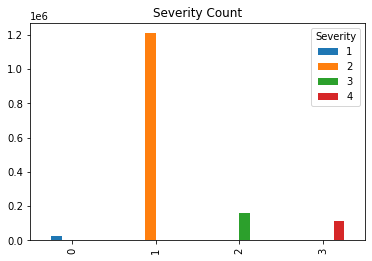

In [66]:
## try to plot source

df_severity = df.groupby(['Severity']).size().reset_index().pivot(columns='Severity', values=0)
df_severity.plot(kind='bar', title='Severity Count')
